# Prepare the data

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import *
from numpy import nan
# Set some Pandas options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)
pd.set_option('precision',3)

from sklearn.manifold import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn import datasets
import scipy.io
from addutils import css_notebook
css_notebook()
%matplotlib inline

## 1. datasets available in scikt-learn

In [9]:
iris=datasets.load_iris()

In [10]:
d=datasets.load_iris()

In [11]:
print (d.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']



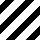
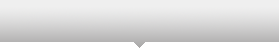
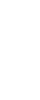
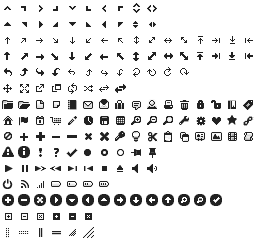
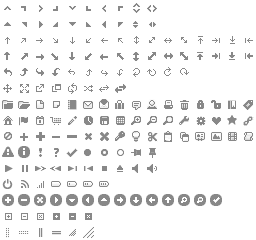
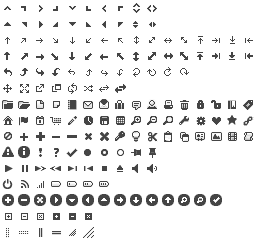
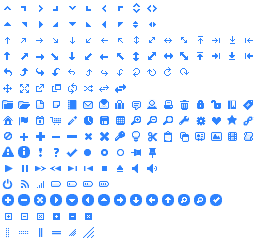
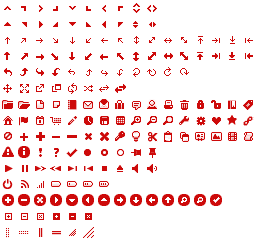
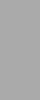
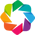
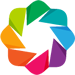
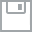
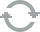
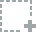
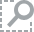
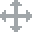
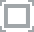
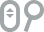

In [17]:
import bokeh.plotting as bk
bk.output_notebook()

In [18]:
from bokeh.palettes import Greys9
from bokeh.models.ranges import Range1d
import addutils.palette as pal
import addutils.imagegrid as ig

digits = datasets.load_digits()

# plot the digits: each image is 8x8 pixels
images = [ digits.images[i][::-1, :] for i in range(40) ]
txt =    [ str(i) for i in range(10) ] * 4

fig = ig.imagegrid_figure(figure_plot_width=800, figure_plot_height=100,
                          figure_title=None,
                          images=images, grid_size=(20, 2), 
                          text=txt, text_font_size='9pt',
                          palette=Greys9[::-1], padding=0.2)
bk.show(fig)

In [5]:
import seaborn as sns
cat_colors = map(pal.to_hex, sns.color_palette('Paired', 7))

In [42]:
data, color_indices = datasets.make_blobs(n_samples=2000, n_features=2, centers=7,
                                   center_box=(-4.0, 6.0), cluster_std=0.5)

fig = bk.figure(title=None)
fig.circle(data[:,0], data[:,1],
            line_color='black', line_alpha=0.5, size=8,
            fill_color=pal.linear_map(color_indices, cat_colors,
                                      low=0, high=6))
bk.show(fig)

## 2.Use Pandas

In [39]:
df=pd.DataFrame(d.data,columns=d.feature_names);df.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2

In [47]:
df['y']=d.target;df.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  y
0                5.1               3.5                1.4               0.2  0
1                4.9               3.0                1.4               0.2  0
2                4.7               3.2                1.3               0.2  0

In [48]:
df[df.columns[:4]].describe().ix[[1,2,3,7]]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean               5.84              3.05               3.76              1.20
std                0.83              0.43               1.76              0.76
min                4.30              2.00               1.00              0.10
max                7.90              4.40               6.90              2.50

In [49]:
x_feat, y_feat = 2, 3 # Choose the features to plot (0-3)
fig = bk.figure(title=None)
colors = ['#006CD1', '#26D100', '#D10000']
color_series = [ colors[i] for i in df['y'] ]
fig.scatter(df[df.columns[x_feat]], df[df.columns[y_feat]], 
            line_color='black', fill_color=color_series,
            radius=0.1)
fig.xaxis.axis_label = df.columns[x_feat]
fig.yaxis.axis_label = df.columns[y_feat]

bk.show(fig)

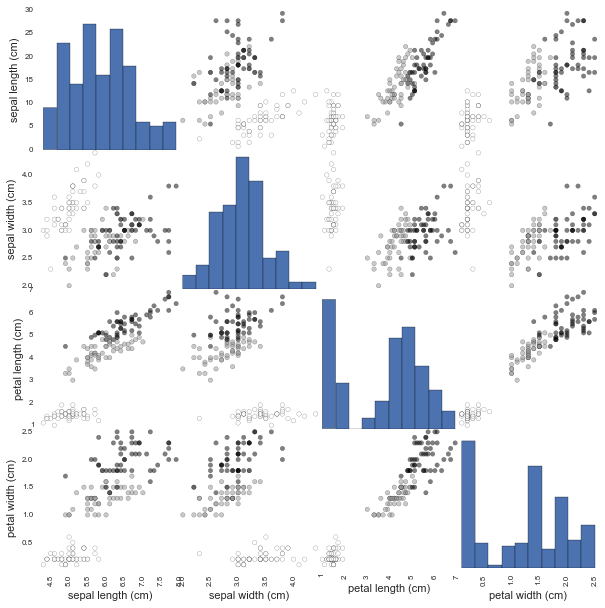

In [53]:
pd.tools.plotting.scatter_matrix(df[df.columns[:4]], figsize=(10, 10),
                                 c=df['y'], diagonal='hist', marker='o')
plt.show()

## 3. Preprocessing Data

### 3.1 Standardizing: Mean removal+Variance Scaling

In [65]:
from sklearn import preprocessing
X=np.array([[10.,1.,0.],
          [20.,0.,2.]])
print X

[[ 10.   1.   0.]
 [ 20.   0.   2.]]


#### preprocessing.scale scales each column of the features matric to mean=0 and std=1. This is also called "STANDARDIZATION".

In [69]:
X_sc_1 = preprocessing.scale(X)
print X, '\nScaled Values:'
print X_sc_1

[[ 10.   1.   0.]
 [ 20.   0.   2.]] 
Scaled Values:
[[-1.  1. -1.]
 [ 1. -1.  1.]]


#### preprocessing.StandardScaler keeps the values of .mean_ and .std_ to allow lately transform and inverse_transform mean and std scaling can be controlled independently:

In [70]:
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X)
X_sc_2 = scaler.transform(X)
print '\nScaled Values: '
print X_sc_2
print '\nStandard Scaler Mean: ', scaler.mean_
print 'Standard Scaler Std:  ', scaler.std_
print '\nInverse Transform: '
print scaler.inverse_transform(X_sc_2)


Scaled Values: 
[[-1.  1. -1.]
 [ 1. -1.  1.]]

Standard Scaler Mean:  [ 15.    0.5   1. ]
Standard Scaler Std:   [ 5.   0.5  1. ]

Inverse Transform: 
[[ 10.   1.   0.]
 [ 20.   0.   2.]]


### 3.2 Preprocessing with Pandas

In [72]:
df=pd.DataFrame(X);df

0  1  2
0  10  1  0
1  20  0  2

In [77]:
df.describe().ix[1:3]

0     1     2
mean  15.00  0.50  1.00
std    7.07  0.71  1.41

In [78]:
df_sc_2 = pd.DataFrame(scaler.transform(df));df_sc_2

0  1  2
0 -1  1 -1
1  1 -1  1

### 3.3 Normalizing: dividing by a norm of the vector

In [87]:
X = np.array([[ 10.,  1., 0.],
              [ 20.,  0., 2.],
              [ 20.,  0., 0.]])
X_nrm=preprocessing.normalize(X,norm='l2',axis=0);

In [83]:
X

array([[ 10.,   1.,   0.],
       [ 20.,   0.,   2.]])